In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

## Definition

Our dataset contains information about each wells operator, which has been anonymized so that each operator is a different operator #. The goal of this notebook is to look at the correlation between operator and other variables to attempt to gain a better undrstanding of how our data is interrelated

## Operator Overview

In [3]:
OperatorList = []
OperatorCount = []

for index, value in DatabaseDF['Operator'].value_counts().iteritems():
    OperatorList.append(index)
    OperatorCount.append(value)

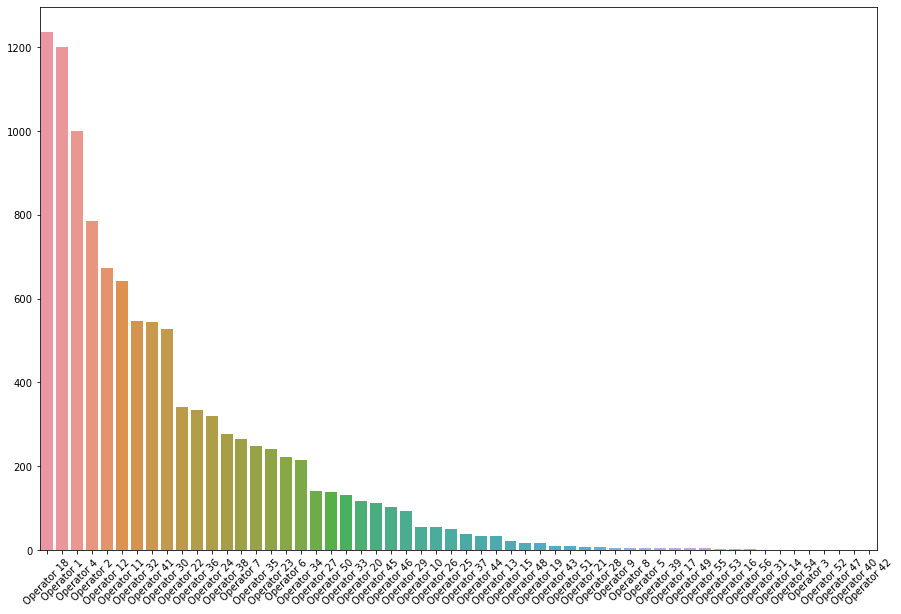

In [4]:
plt.subplots(figsize = (15,10))
g = sns.barplot(x = OperatorList, y = OperatorCount)
plt.xticks(rotation = 45)

plt.show()

This graph shows us the quantity of wells each oprator is responsible for, showing a clear decrease in rate with every new operator. As it stands a majority of the wells were drilled by Operators 18, 1, and 4

Something that will be usefull in dealing with such large ammounts of operators is only looking at the top ones, I will only look at operators who make up 80% of all wells

In [5]:

percentCutoff = sum(OperatorCount) * .80

cutoff = 0

for i in range(0, len(OperatorCount)):
    if (sum(OperatorCount[:i]) >= percentCutoff):
        cutoff = i;
        print(round(sum(OperatorCount[:i])/sum(OperatorCount) * 100,2), "% of wells owned by ",i, " Operators:")
        break

FilteredOperatorList = OperatorList[:cutoff]

print(FilteredOperatorList)

80.06 % of wells owned by  14  Operators:
['Operator 18', 'Operator 1', 'Operator 4', 'Operator 2', 'Operator 12', 'Operator 11', 'Operator 32', 'Operator 41', 'Operator 30', 'Operator 22', 'Operator 36', 'Operator 24', 'Operator 38', 'Operator 7']


In [6]:
OperatorDF = DatabaseDF[DatabaseDF['Operator'].isin(FilteredOperatorList)]

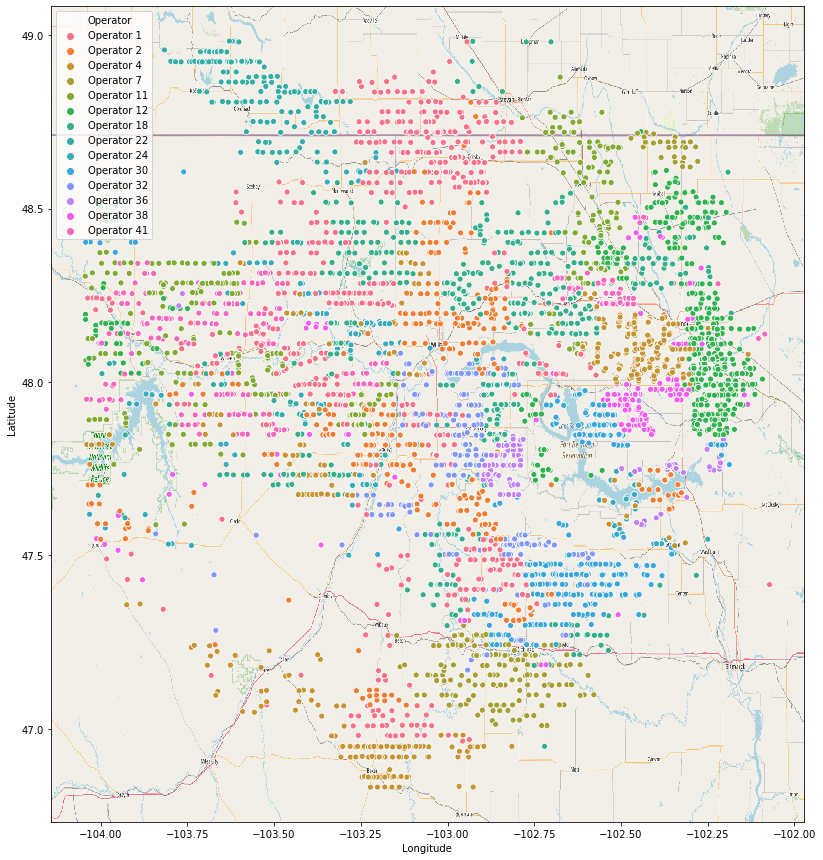

In [7]:
padding = .1

BBox = ((OperatorDF.Longitude.min() - padding,   OperatorDF.Longitude.max() + padding,      
         OperatorDF.Latitude.min() - padding, OperatorDF.Latitude.max() + padding))

areaMap = plt.imread("../Model_Testing/RegionMap.png")

fig, bx = plt.subplots(figsize = (20,10))

fig.set_size_inches(15,15)

bx = sns.scatterplot(x = OperatorDF['Longitude'], y = OperatorDF['Latitude'], hue = OperatorDF['Operator'])
bx.set_xlim(BBox[0],BBox[1])
bx.set_ylim(BBox[2],BBox[3])

bx.imshow(areaMap, zorder = 0, extent = BBox, aspect = 'equal')

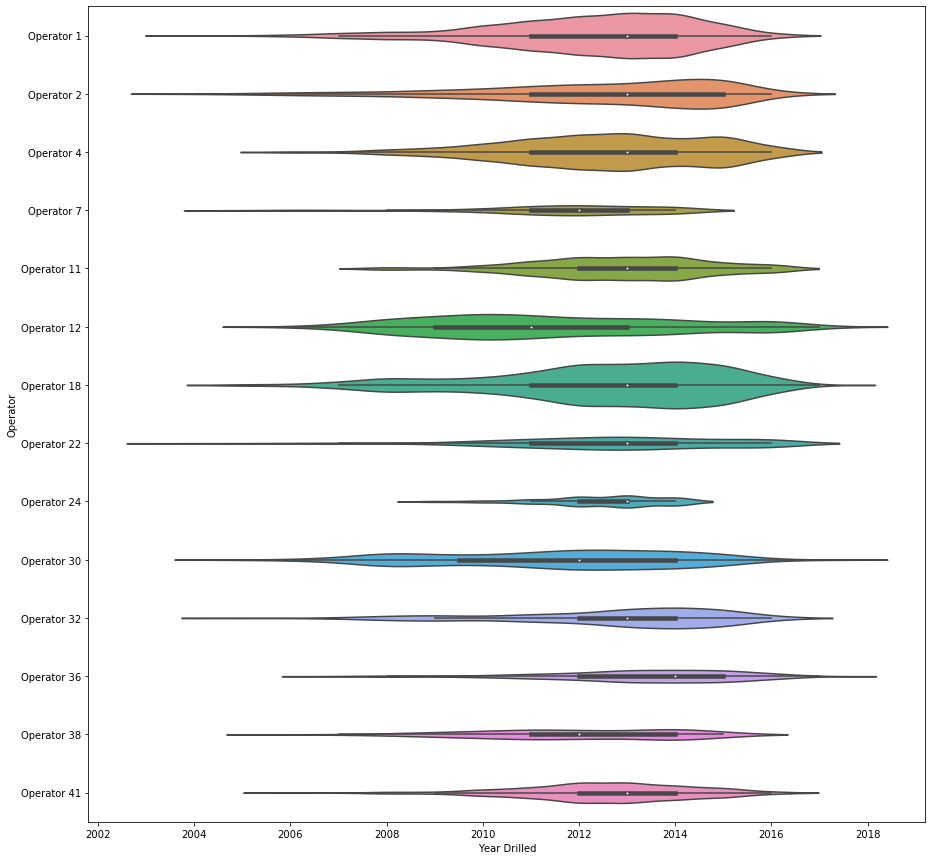

In [8]:
plt.subplots(figsize = (15,15))
sns.violinplot(x = 'Year Drilled', y = 'Operator', data = OperatorDF, scale = 'count')

## Cummulative Oil Production

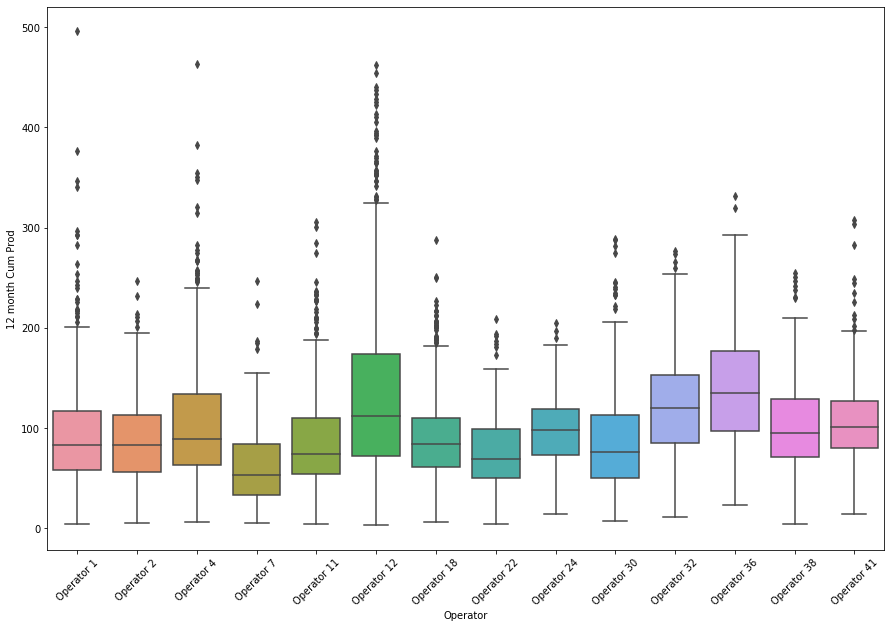

In [9]:
plt.subplots(figsize = (15,10))
sns.boxplot(x = 'Operator', y = '12 month Cum Prod', data = OperatorDF, orient = 'v')
plt.xticks(rotation = 45)

plt.show()

## What makes operators different